# Absenteeism Predictions using different Machine Learning Models

**Group No: 28**

## Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Cleaning and EDA

In [2]:
df=pd.read_excel("Absenteeism_at_work.xls")

In [3]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


## Dataset Description

The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil.The data set (Absenteeism at work) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.

**1.ID**

**2.Reason for absence**
Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI)
**I** Certain infectious and parasitic diseases
**II** Neoplasms
**III** Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
**IV** Endocrine, nutritional and metabolic diseases
**V** Mental and behavioral disorders
**VI** Diseases of the nervous system
**VII** Diseases of the eye and adnexa
**VIII** Diseases of the ear and mastoid process
**IX** Diseases of the circulatory system
**X** Diseases of the respiratory system
**XI** Diseases of the digestive system
**XII** Diseases of the skin and subcutaneous tissue
**XIII** Diseases of the musculoskeletal system and connective tissue
**XIV** Diseases of the genitourinary system
**XV** Pregnancy, childbirth and the puerperium
**XVI** Certain conditions originating in the perinatal period
**XVII** Congenital malformations, deformations and chromosomal abnormalities
**XVIII** Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
**XIX** Injury, poisoning and certain other consequences of external causes
**XX** External causes of morbidity and mortality
**XXI** Factors influencing health status and contact with health services.
And 7 categories without (CID) patient follow-up **(22)**, medical consultation **(23)**, blood donation **(24)**, laboratory examination **(25)**, unjustified absence **(26)**, physiotherapy **(27)**, dental consultation **(28)**.

**3. Month of absence**

**4. Day of the week** (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))

**5. Seasons** (summer (1), autumn (2), winter (3), spring (4))

**6. Transportation expense**

**7. Distance from Residence to Work** (kilometers)

**8. Service time**

**9. Age**

**10. Work load Average/day**

**11. Hit target**

**12. Disciplinary failure**:yes=1; no=0

**13. Education**: high school (1), graduate (2), postgraduate (3), master and doctor (4)

**14. Son**:number of children

**15. Social drinker**: yes=1; no=0

**16. Social smoker**: yes=1; no=0

**17. Pet** :number of pet

**18. Weight**

**19. Height**

**20. Body mass index**

**21. Absenteeism** time in hours(target)

### Generating descriptive statistics.

Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [4]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


**Printing a concise summary of a DataFrame**

Printing information about the dataFrame including the index dtype and columns, non-null values and memory usage

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

**Printing the shape of the dataframe**

In [6]:
df.shape

(740, 21)

**Checking the Missing Values**

In [7]:
df.isnull().any()

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
dtype: bool

There are 0 missing values . 

**Finding the duplicated values**

In [8]:
print("There are {} duplicated values in data frame".format(df.duplicated().sum()))

There are 34 duplicated values in data frame


**Displaying the duplicated values**

In [9]:
duplicated = df[df.duplicated(keep=False)]
duplicated

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
16,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
63,34,23,10,3,4,118,10,10,37,253465,...,0,1,0,0,0,0,83,172,28,3
68,34,23,10,3,4,118,10,10,37,253465,...,0,1,0,0,0,0,83,172,28,3
81,28,23,11,4,4,225,26,9,28,306345,...,0,1,1,0,0,2,69,169,24,1
88,28,23,11,4,4,225,26,9,28,306345,...,0,1,1,0,0,2,69,169,24,1
105,10,22,12,4,4,361,52,3,28,261306,...,0,1,1,1,0,4,80,172,27,8
109,10,22,12,4,4,361,52,3,28,261306,...,0,1,1,1,0,4,80,172,27,8
118,27,23,1,5,2,184,42,7,27,308593,...,0,1,0,0,0,0,58,167,21,2
121,34,27,1,2,2,118,10,10,37,308593,...,0,1,0,0,0,0,83,172,28,2


**Removing the duplicated values**

In [10]:
df.drop_duplicates(inplace=True)


print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 0 duplicated values in data frame


In [11]:
df.shape

(706, 21)

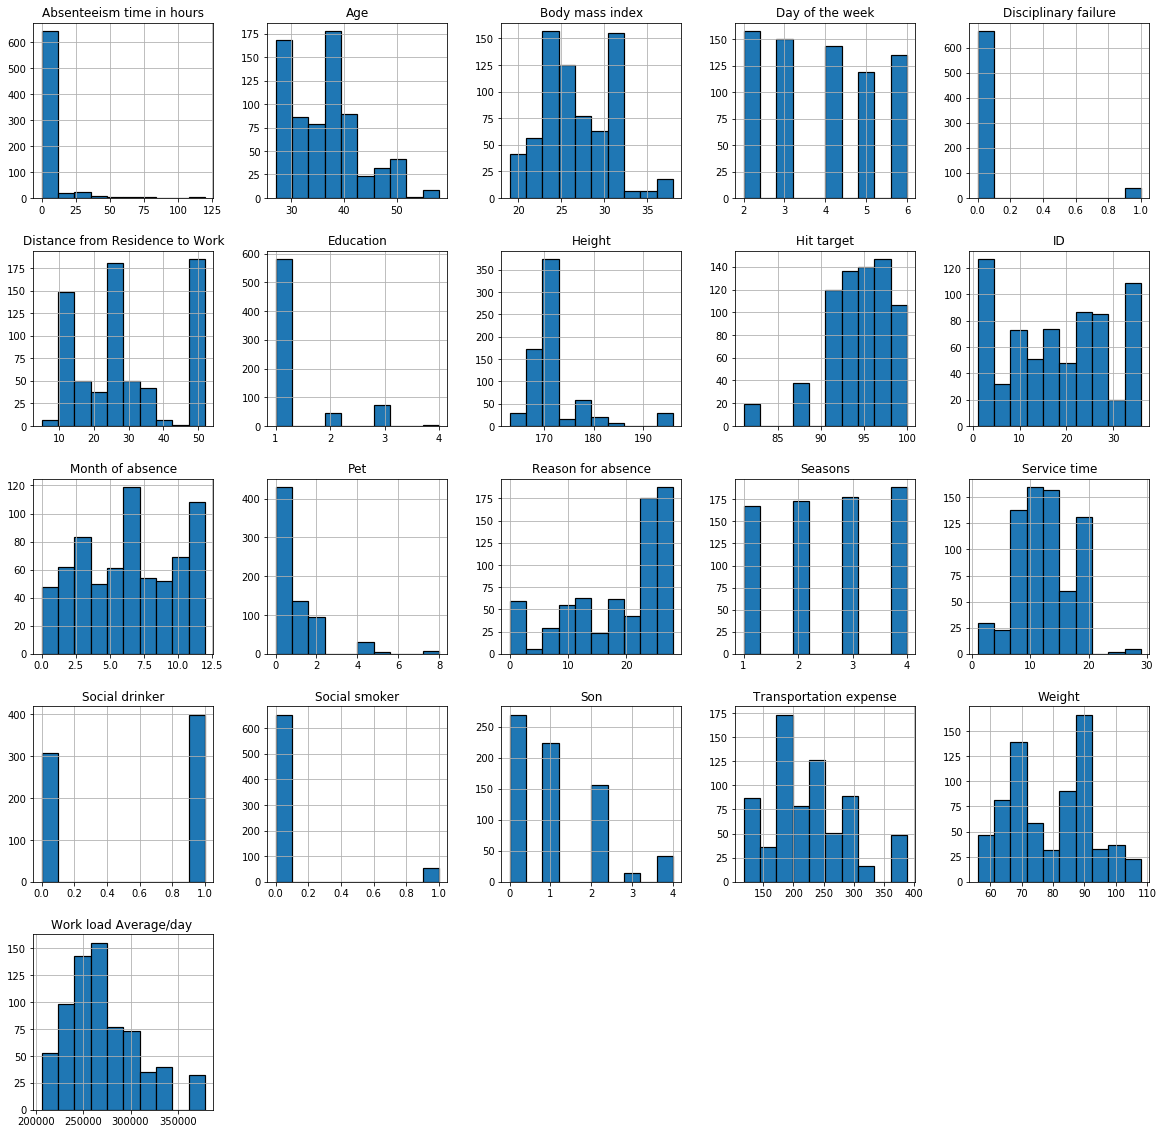

In [64]:
# Visulazing the distibution of the data for every feature
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

**Exploring the target variable Absenteeism**

In [91]:
df.Absenteeism.value_counts()

8      207
2      137
3      102
1       85
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism, dtype: int64

We have 206 people who have taken absence for 8 hours which is the majority absence in hours.

<AxesSubplot:>

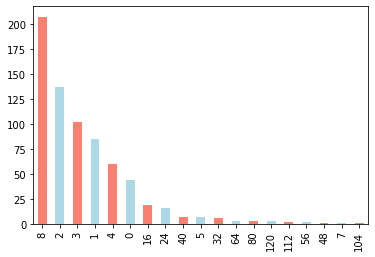

In [92]:
df.Absenteeism.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

**Multivariate analysis**

<AxesSubplot:title={'center':'Correlation with Response Variable Absenteeism'}>

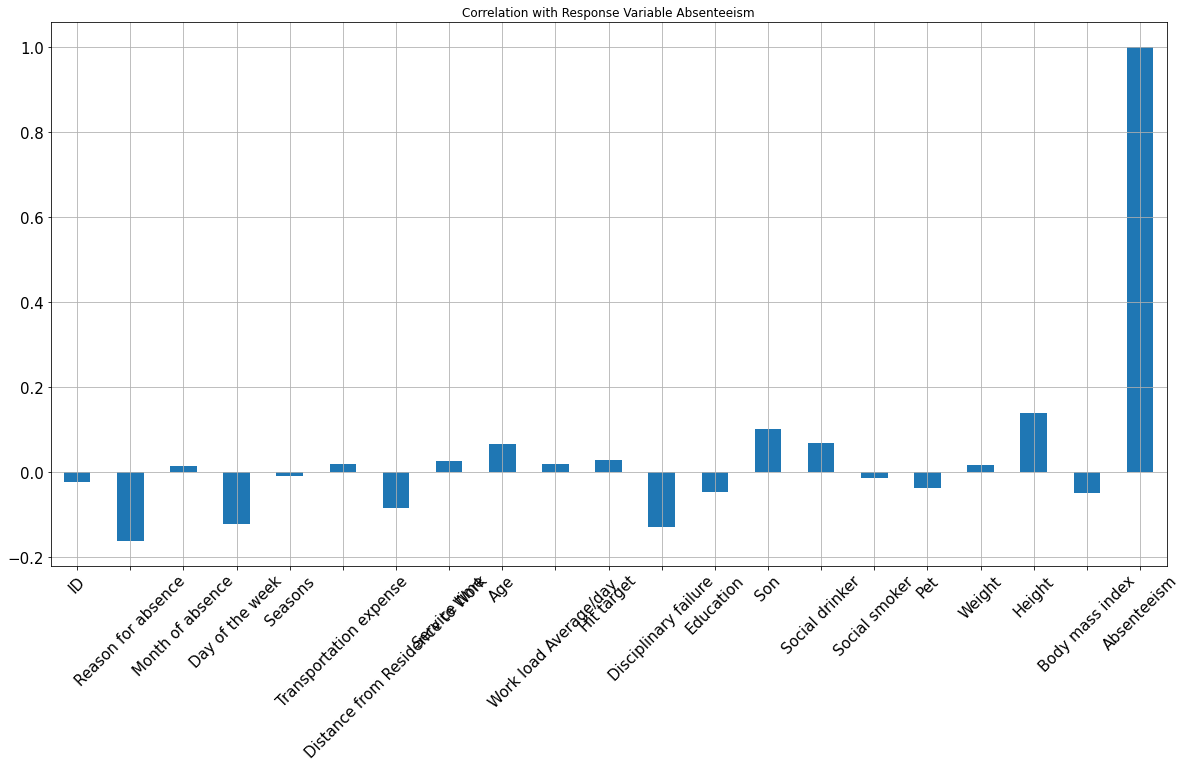

In [93]:
df.corrwith(df.Absenteeism).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable Absenteeism', 
                                   fontsize = 15, rot = 45, grid = True)

Correlation can be used to summarize linear relationship between two data samples.There are different types of correlation.
An increase in one causes an increase in the other(positive correlation), an increase in one causes a decrease in the other(negative correlation) and a change in one variable does not cause a change in the another(neutral correlation).Here we can see that Reason for absence has the highest negative correlation with Absenteeism and the variable Height has the highest positive correlation with the target variable Absenteeism.

**Correlation Matrix**

(21.0, 0.0)

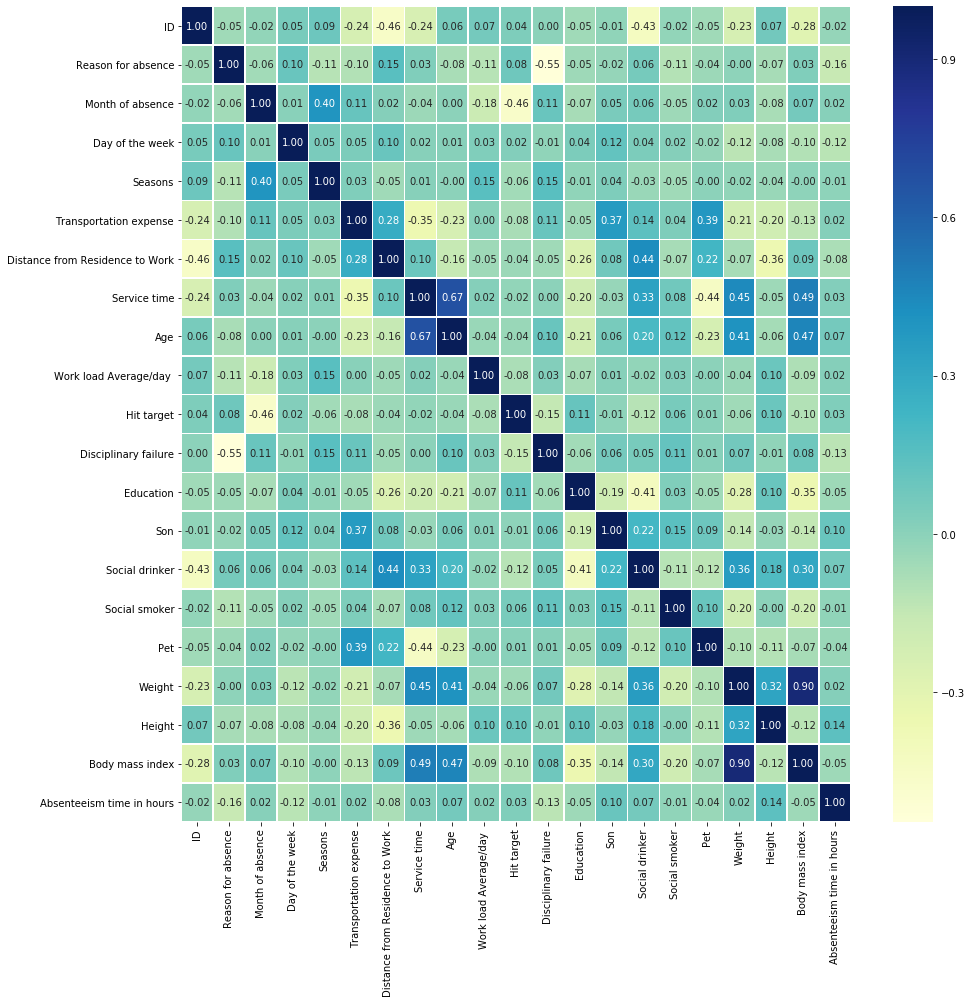

In [65]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Feature Engineering

Feature Engineering is a data preparation process. One modifies the data such that Machine Learning algorithms identify more patterns. This is done by combining and transforming existing features into new features

In [66]:
df['Age Category'] = ['young employee' if 25<=age<=35 else 'mid age employee' if 36<=age<=45 else 'old employee' if age>=45 else None\
                      for age in list(df['Age'].values)  ] 
df['Education category'] = ['high school' if  period ==1 else 'grudate' if  period ==2 else "postgraduate" if  period ==3 else 'doctor' if  period ==4 else  None \
                               for period in list (df['Education'].values)]
df['Smoke category'] = ['no' if period<=0 else 'yes' if period >=1 else None \
                               for period in list (df['Social smoker'].values)]
df['Disciplinary category'] = ['not taken' if period<=0 else 'taken' if period >=1 else None \
                               for period in list (df['Disciplinary failure'].values)]
df['Drink category'] = ['no' if period<=0 else 'yes' if period >=1 else None \
                               for period in list (df['Social drinker'].values)]

df['Transportation category '] = ['cheap' if 100<=tfare<=200 else 'expensive' if 200<=tfare<=300 else 'very expensive' if tfare>300 else None \
                                   for tfare in list(df["Transportation expense"].values)]
df['Distace category'] = ['close' if 0<=tfare<=15 else 'far' if 15<=tfare<=35 else 'very far' if tfare>35 else None \
                                   for tfare in list(df["Distance from Residence to Work"].values)]
df['Absenteeism category'] = ['moderate' if 0<=period<=5 else 'excessive' if period>=5 else None \
                               for period in list (df["Absenteeism time in hours"].values)]

In [67]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Body mass index,Absenteeism time in hours,Age Category,Education category,Smoke category,Disciplinary category,Drink category,Transportation category,Distace category,Absenteeism category
0,11,26,7,3,1,289,36,13,33,239554,...,30,4,young employee,high school,no,not taken,yes,expensive,very far,moderate
1,36,0,7,3,1,118,13,18,50,239554,...,31,0,old employee,high school,no,taken,yes,cheap,close,moderate
2,3,23,7,4,1,179,51,18,38,239554,...,31,2,mid age employee,high school,no,not taken,yes,cheap,very far,moderate
3,7,7,7,5,1,279,5,14,39,239554,...,24,4,mid age employee,high school,yes,not taken,yes,expensive,close,moderate
4,11,23,7,5,1,289,36,13,33,239554,...,30,2,young employee,high school,no,not taken,yes,expensive,very far,moderate


### Effect of Age on Absenteeeism

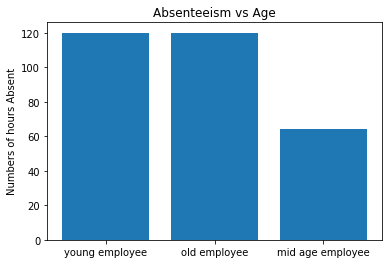

In [68]:
plt.bar(df['Age Category'],df['Absenteeism time in hours'])
plt.ylabel("Numbers of hours Absent")
plt.title('Absenteeism vs Age')
plt.show()

Mid aged employees are more dedicated and more punctual but the young and old employees have alarming numbers of hours absence

### Effect of Education on Absenteeism

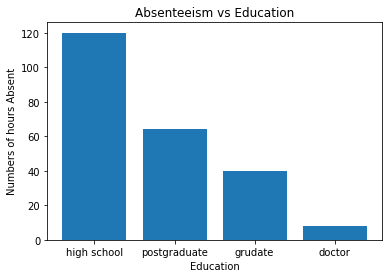

In [69]:
plt.bar(df['Education category'],df['Absenteeism time in hours'])
plt.xlabel('Education')
plt.ylabel("Numbers of hours Absent")
plt.title('Absenteeism vs Education')
plt.show()

The level of education reflects on the punctuality of individuals.Higher the education , lesser the absence 

### Effect of Distance on Absenteeism

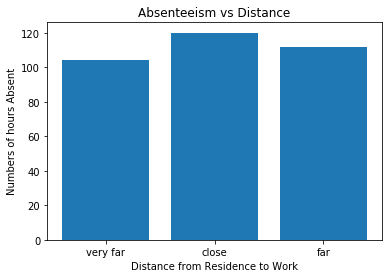

In [70]:
plt.bar(df['Distace category'],df['Absenteeism time in hours'])
plt.xlabel('Distance from Residence to Work')
plt.ylabel("Numbers of hours Absent")
plt.title('Absenteeism vs Distance')
plt.show()

### Effect of Transportation Expense on Absenteeism

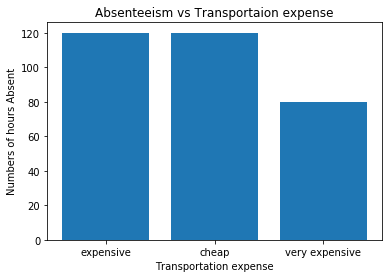

In [71]:
plt.bar(df['Transportation category '],df['Absenteeism time in hours'])
plt.xlabel('Transportation expense')
plt.ylabel("Numbers of hours Absent")
plt.title('Absenteeism vs Transportaion expense')
plt.show()

### Effect of Smoking on Absenteeism

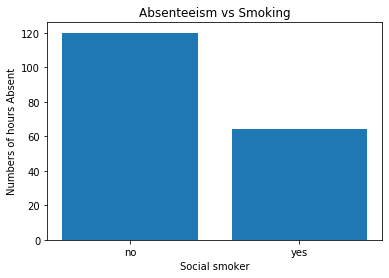

In [72]:
plt.bar(df['Smoke category'],df['Absenteeism time in hours'])
plt.xlabel('Social smoker')
plt.ylabel("Numbers of hours Absent")
plt.title('Absenteeism vs Smoking')
plt.show()

Employees who smoke tend to have more hours of absence than those who don’t.

### Effect of Drinking on Absenteeism

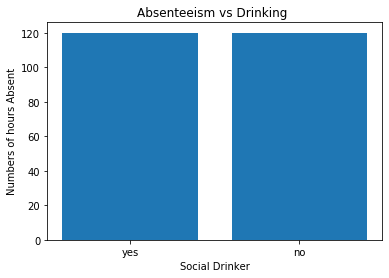

In [73]:
plt.bar(df['Drink category'],df['Absenteeism time in hours'])
plt.xlabel('Social Drinker')
plt.ylabel("Numbers of hours Absent")
plt.title('Absenteeism vs Drinking ')
plt.show()

Drinking alcohol have huge effect in absenteesim as it seems drinkers take leave for about 60 hours.

### Effect of Disciplinary action on Absenteeism

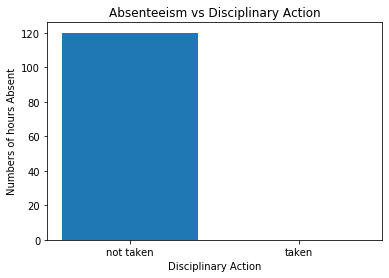

In [74]:
plt.bar(df['Disciplinary category'],df['Absenteeism time in hours'])
plt.xlabel('Disciplinary Action')
plt.ylabel("Numbers of hours Absent")
plt.title('Absenteeism vs Disciplinary Action')
plt.show()

Disciplinary actions have the highest effect on hours of the absence. 
When disciplinary measures are taken employees tends to starts to be punctual.

### Level of Absenteeism Hours

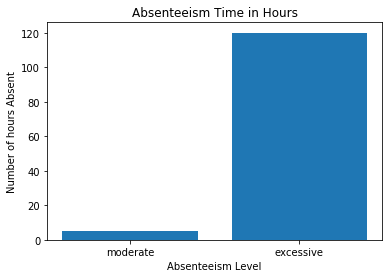

In [75]:
plt.bar(df['Absenteeism category'],df['Absenteeism time in hours'])
plt.xlabel('Absenteeism Level')
plt.ylabel("Number of hours Absent")
plt.title('Absenteeism Time in Hours')
plt.show()

It can be seen that numerous employees take absent of excessive hours from work

## Building Random Forset Classifier

**Splitting data to train and test set**

In [12]:
X = df.iloc[:, 0:20].values
y = df.iloc[:, 20].values

In [13]:
X

array([[ 11,  26,   7, ...,  90, 172,  30],
       [ 36,   0,   7, ...,  98, 178,  31],
       [  3,  23,   7, ...,  89, 170,  31],
       ...,
       [  4,   0,   0, ...,  98, 170,  34],
       [  8,   0,   0, ..., 100, 170,  35],
       [ 35,   0,   0, ...,  77, 175,  25]], dtype=int64)

In [14]:
y

array([  4,   0,   2,   4,   2,   2,   8,   4,  40,   8,   8,   8,   8,
         1,   4,   8,   8,   8,   2,   8,   1,  40,   4,   8,   7,   1,
         4,   8,   2,   8,   8,   4,   8,   2,   1,   8,   4,   8,   4,
         2,   4,   4,   8,   2,   3,   3,   4,   8,  32,   0,   0,   2,
         2,   0,   0,   3,   3,   0,   1,   3,   4,   3,   3,   0,   1,
         3,   3,   2,   2,   5,   8,   3,  16,   8,   2,   8,   1,   3,
         1,   1,   8,   8,   5,  32,   8,  40,   8,   3,   8,   3,   4,
         1,   3,  24,   3,   1,  64,   2,   8,   2,   8,  56,   8,   3,
         3,   2,   2,   8,   2,   1,   1,   1,   8,   2,   2,   2,   1,
         2,   2,   2,   2,   2,   2,   8,   8,   0,   1,   3,   1,   8,
         8,   2,   8,   2,   8,   8,   8,   2,   2,   1,   8,   3,   8,
         1,   1,   8,   2,   8,   3,   8,   8,   8,   8,   3,  40,  40,
        16,  16,   8,   8,   8,   4,   1,   8,  24,   2,   8,   1,   8,
        16,   3,  16,   2,   3,   1,   1,   1,   1,  24,   1,   

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**Feature Scaling**

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Training the Algorithm**

In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=700,max_depth=7, random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred2=clf.predict(X_train)

**Evaluating the algorithm**

In [18]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 47.16981132075472


**Printing the accuracy of test and train data**

In [19]:
print("Random Forest Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))

Random Forest Accuracy on test data: 0.4716981132075472


In [20]:
print("Random Forest Accuracy on training data:",metrics.accuracy_score(y_train, y_pred2))

Random Forest Accuracy on training data: 0.7267206477732794


**Plotting the test and train accuracies**

In [21]:
a=metrics.accuracy_score(y_test, y_pred)
b=metrics.accuracy_score(y_train, y_pred2)

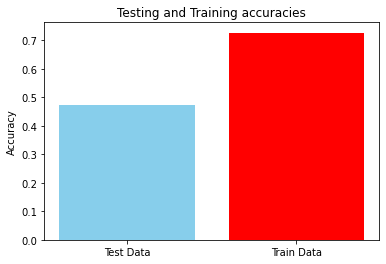

In [22]:
x='Test Data' 
y='Train Data'
c=[x,y] 
d=[a,b]
plt.bar(c,d,color=['skyblue','red'])
plt.ylabel('Accuracy')
plt.title('Testing and Training accuracies')
plt.show()

# Decision Tree Classifier

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = 0.3 ,random_state = 0)


#import the 'DecisionTreeClassifier' function from the 'tree' subpackage of sklearn.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

#fit the training data using DecisionTreeClassifier().
clf.fit(X_train,y_train)

# predict the new values for the testing set.
y_pred = clf.predict(X_test)
print("The actual testing data\n ",y_test)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
print("\n")
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

#Evaluating the Results 
from sklearn import metrics
print("\n")
print("Results :")
print("Decision Tree Classifier Accuracy on training data:",metrics.accuracy_score(y_train, y_pred2))
print("Decision Tree Classifier  Accuracy on test data:",metrics.accuracy_score(y_test, y_pred))


The actual testing data
  [  1   0   8   8   2   2   1   2   4   0   1   3   0   3   4  16   3   0
   4  40   2  40   1   1   0   2   1   8   8   2   4   8   0  24  16   0
   8   8   8   0   2   4   3   8   8   1   8   8   4   0   3   8   4   3
   4   3   8   0   8   8   2   2   4   2   2   2   4   8   1   8   2   2
   1   3   3   0   1   2   8   8   4   2   8   2   2  80   1   3   4   3
   1   4   0   8   8   2   2   2   2   8   3   3 120   0   2   8  80   8
   2  32   3   3   8   2   2   1   1   3   2   2   3   1   8   8   4   2
   1   0   2   2   8   4   3   0   8   2   2   3   1   1   8   4   8   3
   8   1   8   2   8  16   3   1   3   3   4   2   8   2   1   3   1   4
   1  40   2   3   8   0   0   8   3  32   1   1   4  56   8   3   4   1
   3   8   8   1   2   2   2   2   3   1   1   3   8   5  40   3   8   0
   8   8   8   4   8   8   2   2   8   3   1   3   4   3]


Confusion Matrix
[[18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 12  1  3  2  0  1  5  3  1  0  1  0  0

## Tuning Decision Tree Model

In [24]:
#Setting the maximum depth of the tree to 3
clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.49
Accuracy of Decision Tree classifier on test set: 0.40


In [25]:
#Setting the maximum depth of the tree to 6
clf = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.60
Accuracy of Decision Tree classifier on test set: 0.42


In [26]:
#Setting the maximum leaf nodes of the tree to 6
clf = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.49
Accuracy of Decision Tree classifier on test set: 0.40


In [27]:
#Setting the maximum leaf nodes of the tree to 12
clf = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.51
Accuracy of Decision Tree classifier on test set: 0.42


In [28]:
#Setting the maximum sample split of the tree to 20
clf = DecisionTreeClassifier(min_samples_split=20).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.63
Accuracy of Decision Tree classifier on test set: 0.40


In [29]:
#Setting the maximum sample split of the tree to 30
clf = DecisionTreeClassifier(min_samples_split=10).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.73
Accuracy of Decision Tree classifier on test set: 0.40


In [30]:
#Setting the Criteria for split as Entropy 
clf = DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on test set: 0.39


In [31]:
#Setting the Criteria for split as Entropy 
clf = DecisionTreeClassifier(criterion="entropy").fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.96
Accuracy of Decision Tree classifier on test set: 0.40


In [32]:
#Setting the miinmum impurity of the tree to 0.05
clf = DecisionTreeClassifier(min_impurity_decrease=0.05).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.47
Accuracy of Decision Tree classifier on test set: 0.41


## Final Model of Decision Tree Classifier¶

The actual testing data
  [  1   0   8   8   2   2   1   2   4   0   1   3   0   3   4  16   3   0
   4  40   2  40   1   1   0   2   1   8   8   2   4   8   0  24  16   0
   8   8   8   0   2   4   3   8   8   1   8   8   4   0   3   8   4   3
   4   3   8   0   8   8   2   2   4   2   2   2   4   8   1   8   2   2
   1   3   3   0   1   2   8   8   4   2   8   2   2  80   1   3   4   3
   1   4   0   8   8   2   2   2   2   8   3   3 120   0   2   8  80   8
   2  32   3   3   8   2   2   1   1   3   2   2   3   1   8   8   4   2
   1   0   2   2   8   4   3   0   8   2   2   3   1   1   8   4   8   3
   8   1   8   2   8  16   3   1   3   3   4   2   8   2   1   3   1   4
   1  40   2   3   8   0   0   8   3  32   1   1   4  56   8   3   4   1
   3   8   8   1   2   2   2   2   3   1   1   3   8   5  40   3   8   0
   8   8   8   4   8   8   2   2   8   3   1   3   4   3]


Confusion Matrix
[[18  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 14  8  0  0  0  8  0  0  0  0  0  0  0]
 [ 0

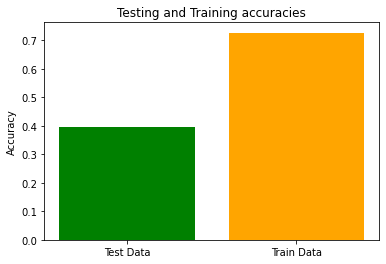

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.21      0.47      0.29        30
           2       0.36      0.44      0.40        43
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00         1
           8       0.45      0.66      0.53        50
          16       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         1
          32       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         4
          56       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         2
         120       0.00      0.00      0.00         1

    accuracy                           0.40       212
   macro avg       0.14      0.18      0.16       212
weighted avg       0.29      0.40      0.33       212



C:\Users\rpriy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:

#import the 'DecisionTreeClassifier' function from the 'tree' subpackage of sklearn.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="gini",max_depth=3,max_leaf_nodes=6,min_samples_split=20)

#fit the training data using DecisionTreeClassifier().
clf.fit(X_train,y_train)

# predict the new values for the testing set.
y_pred = clf.predict(X_test)
print("The actual testing data\n ",y_test)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
print("\n")
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))

#Evaluating the Results 
from sklearn import metrics
print("\n")
print("Results :")
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

#Ploting the accuracies 
a=metrics.accuracy_score(y_test, y_pred)
b=metrics.accuracy_score(y_train, y_pred2)
x='Test Data' 
y='Train Data'
c=[x,y] 
d=[a,b]
plt.bar(c,d,color=['Green','Orange'])
plt.ylabel('Accuracy')
plt.title('Testing and Training accuracies')
plt.show()

#Classification Report
print('Classification Report')
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

# Logistic Regression

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [88]:
#splitting train and test data 
train,test = train_test_split(df,test_size = 0.3 ,random_state = 0)

In [90]:
#splitting train and test data 
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
testing_score=logreg.score(X_test,y_test)
testing_score

0.4507042253521127

In [92]:
training_score=logreg.score(X_train,y_train)
training_score

0.48936170212765956

## Building Artificial Neural Network

### Create Training and Testing Datasets

The output class is reduced, as it increases the network’s probability of finding the right output class.SThey are reduced from a possible 120 to 2. A new column called class has been added to the original dataset and the 2 subranges for the values of
the output neurons are as follows:


In [22]:
table = pd.DataFrame({'Absenteeism Time (in hours)': ['Between 0 - 50', 'More than 50'], 'Class': [0,1]})
table


,Absenteeism Time (in hours),Class
0,Between 0 - 50,0
1,More than 50,1


Reading the new dataset after adding class column

In [37]:
df1=pd.read_csv("new.csv")

**Dropping ID column**

In [38]:
df1=df1.drop(['ID'],axis=1)

In [39]:
y = df1.Class.values
X = df1.drop(['Class'], axis=1)

In [40]:
X

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,4
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24,4
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,14,7,3,1,289,36,13,33,264604,93,0,1,2,1,0,1,90,172,30,8
702,11,7,3,1,235,11,14,37,264604,93,0,3,1,0,0,1,88,172,29,4
703,0,0,3,1,118,14,13,40,271219,95,0,1,1,1,0,8,98,170,34,0
704,0,0,4,2,231,35,14,39,271219,95,0,1,2,1,0,2,100,170,35,0


In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0, test_size = 0.2)

In [43]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()                         
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [44]:
X_train_scaled

array([[0.35714286, 0.5       , 1.        , ..., 0.21212121, 0.21052632,
        0.06666667],
       [0.96428571, 0.16666667, 0.5       , ..., 0.21212121, 0.63157895,
        0.025     ],
       [0.03571429, 0.91666667, 0.        , ..., 0.33333333, 0.10526316,
        0.06666667],
       ...,
       [0.46428571, 0.33333333, 0.75      , ..., 0.12121212, 0.31578947,
        0.06666667],
       [0.64285714, 0.08333333, 0.25      , ..., 1.        , 0.31578947,
        0.06666667],
       [1.        , 0.5       , 0.75      , ..., 0.24242424, 0.31578947,
        0.01666667]])

In [45]:
from tensorflow import keras

**Building and Training the Neural Network**

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(20,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [48]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [49]:
history=model.fit(X_train_scaled, y_train, epochs=20, batch_size=10,validation_data=(X_test_scaled, y_test))

Epoch 1/20
57/57 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.9291 - val_loss: 0.2694 - val_accuracy: 0.9789
Epoch 2/20
57/57 [==============================] - 0s 1ms/step - loss: 0.1603 - accuracy: 0.9805 - val_loss: 0.1198 - val_accuracy: 0.9789
Epoch 3/20
57/57 [==============================] - 0s 972us/step - loss: 0.1019 - accuracy: 0.9805 - val_loss: 0.1087 - val_accuracy: 0.9789
Epoch 4/20
57/57 [==============================] - 0s 1ms/step - loss: 0.0950 - accuracy: 0.9805 - val_loss: 0.1037 - val_accuracy: 0.9789
Epoch 5/20
57/57 [==============================] - 0s 1ms/step - loss: 0.0905 - accuracy: 0.9805 - val_loss: 0.0991 - val_accuracy: 0.9789
Epoch 6/20
57/57 [==============================] - 0s 1ms/step - loss: 0.0864 - accuracy: 0.9805 - val_loss: 0.0951 - val_accuracy: 0.9789
Epoch 7/20
57/57 [==============================] - 0s 1ms/step - loss: 0.0821 - accuracy: 0.9805 - val_loss: 0.0903 - val_accuracy: 0.9789
Epoch 8/20
57/57 [

In [50]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)

5/5 [==============================] - 0s 1ms/step - loss: 0.0266 - accuracy: 0.9859
Test accuracy: 0.98591548204422


**Plotting the model accuracy and model loss**

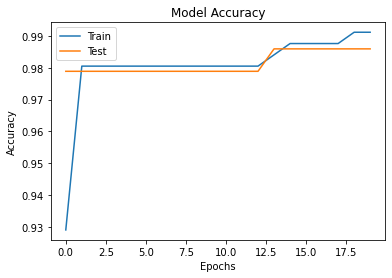

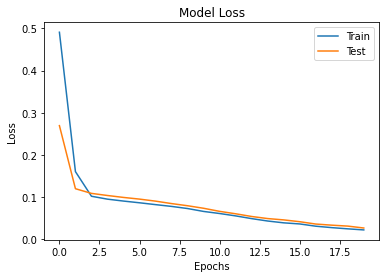

In [51]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Classification Analysis - SVM(linear,polynomial,RBF)

In [93]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import sklearn.metrics as sk
print('Linear Model',end='\n')
lsvclassifier = SVC(kernel='linear')
lsvclassifier.fit(X_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = lsvclassifier, X = X_train, y = y_train, cv = 5)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_linear*100,end='\n')
print('Standard deviation of Accuracies',std_svm_linear*100,end='\n')

#Predict SVM
y_predl = lsvclassifier.predict(X_test)
print('Linear Model',end='\n')
lsvclassifier = SVC(kernel='linear')
lsvclassifier.fit(X_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = lsvclassifier, X = X_train, y = y_train, cv = 5)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_linear*100,end='\n')
print('Standard deviation of Accuracies',std_svm_linear*100,end='\n')

#Predict SVM
y_predl = lsvclassifier.predict(X_test)


Linear Model
After 5 fold cross validation:

C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)



Mean of Accuracies:  46.88870761793166
Standard deviation of Accuracies 5.507790850917688
Linear Model


C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


After 5 fold cross validation:
Mean of Accuracies:  46.88870761793166
Standard deviation of Accuracies 5.507790850917688


In [94]:
#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y_test,y_predl))
print('Accuracy: ',sk.accuracy_score(y_test, y_predl, normalize=True, sample_weight=None))

Test Output:
Confusion Matrix:
[[14  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  1  7  1  0  9  0  0  0  0  0  0]
 [ 0  2 18  6  0  7  0  0  0  0  0  0]
 [ 0  1  7  5  0  6  0  0  0  0  0  0]
 [ 0  1  5  1  3  6  0  0  0  0  0  0]
 [ 0  2  5  1  0 24  0  0  0  0  0  0]
 [ 0  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.14      0.06      0.08        18
           2       0.42      0.55      0.47        33
           3       0.36      0.26      0.30        19
           4       1.00      0.19      0.32        16
           8       0.39      0.75      0.52        32
          16       0.00      0.00      0.00         2
          24       0.00      0.00      0.00 

C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [95]:
#Polynomial SVM
print('Polynomial Model',end='\n')
psvclassifier = SVC(kernel='poly')
psvclassifier.fit(X_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = psvclassifier, X = X_train, y = y_train, cv = 5)
mean_svm_poly=accuracies.mean()
std_svm_poly=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_poly*100,end='\n')
print('Standard deviation of Accuracies',std_svm_poly*100,end='\n')

#Predict SVM
y_predp = psvclassifier.predict(X_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y_test,y_predp))
print('Classification Report:')
print(sk.classification_report(y_test,y_predp))
print('Accuracy: ',sk.accuracy_score(y_test, y_predp, normalize=True, sample_weight=None))

Polynomial Model
After 5 fold cross validation:
Mean of Accuracies:  31.10012818968395
Standard deviation of Accuracies 1.4847105609237132
Test Output:
Confusion Matrix:
[[ 0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  0  0  0  0 18  0  0  0  0  0  0]
 [ 0  0  0  0  0 33  0  0  0  0  0  0]
 [ 0  0  0  0  0 19  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  0  0  0  0]
 [ 0  0  0  0  0 32  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        33
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        16
           8 

C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamm

In [96]:
#RBF SVM
print('RBF Model',end='\n')
rsvclassifier = SVC(kernel='rbf')
rsvclassifier.fit(X_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = rsvclassifier, X = X_train, y = y_train, cv = 5)
mean_svm_rbf=accuracies.mean()
std_svm_rbf=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_rbf*100,end='\n')
print('Standard deviation of Accuracies',std_svm_rbf*100,end='\n')

#Predict SVM
y_predr = rsvclassifier.predict(X_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y_test,y_predr))
print('Classification Report:')
print(sk.classification_report(y_test,y_predr))
print('Accuracy: ',sk.accuracy_score(y_test, y_predr, normalize=True, sample_weight=None))

RBF Model
After 5 fold cross validation:

C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamm


Mean of Accuracies:  40.93754420426018
Standard deviation of Accuracies 3.4541902873673656
Test Output:
Confusion Matrix:
[[14  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  6  0  0 12  0  0  0  0  0  0]
 [ 0  0 14  0  0 19  0  0  0  0  0  0]
 [ 0  0  6  0  0 13  0  0  0  0  0  0]
 [ 0  0  4  0  0 12  0  0  0  0  0  0]
 [ 0  0  5  0  0 27  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.00      0.00      0.00        18
           2       0.40      0.42      0.41        33
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00        16
           8       0.29      0.84      0.43        32
      

C:\Users\talwi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
